In [1]:
import random
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from functools import reduce
import itertools as it
import seaborn as sns
from collections import Counter
import numpy
from matplotlib.pyplot import figure
from tqdm.notebook import tqdm, trange
import time

In [2]:
sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes
sns.color_palette('pastel')


[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

In [6]:
max_strat = 6
min_strat = -5
max_score = 5
min_score = -5

pairs = 125
generations = 250 # 160
print(generations)
population = 100

cost = 0.1
benefit = 1

mutation = 0.000
# TODO -> Mais pequeno

simulations = pow(10, 3)

250


In [4]:
class Agent:
    def __init__(self, strategy, score, payoff):
        self.payoff = payoff
        self.strategy = strategy
        self.score = score
        
    def add_score(self, new_score):
        temp_score = new_score + self.score
        if temp_score >= min_score and temp_score <= max_score:
             self.score = temp_score
        elif temp_score <= min_score:
            self.score = min_score
        elif temp_score >= max_score:
            self.score = max_score

In [5]:
def selectOne(population):
    max_value     = sum([c.payoff for c in population])
    pick    = random.uniform(0, max_value)
    current = 0
    for agent in population:
        current += agent.payoff
        if current >= pick:
            return agent

In [6]:
def ProbabilityList(population_d):
    fitness = [c.payoff for c in population_d ]
    total_fit = sum(fitness)
    relative_fitness = [f/total_fit for f in fitness]
    return relative_fitness

def FitnessChoices(population, relative_fitness, number):
    return random.choices(population, weights = relative_fitness, k = number)

In [7]:
global_strategies = []
global_strategies_average = []

global_strategies_t_10 = []
global_strategies_average_t10 = []

global_strategies_t_20 = []
global_strategies_average_t20 = []

global_strategies_t_0 = []
global_strategies_average_t0 = []

cooperative_strategies = []

print(simulations)
for simulation in trange(simulations) :
    
    cooperative_interactions = 0
    all_interactions = 0
    
    global_strategies.clear()
    global_strategies_t_0.clear()
    global_strategies_t_10.clear()
    global_strategies_t_20.clear()
    cooperative_strategies.clear()
    agents = []
    
    for i in range(population):
        agents.append(Agent(random.randint(min_strat, max_strat), 0,0))
    

    for generation in range(generations) :

        if generation == 0:
            for agent in agents:
                global_strategies_t_0.append(agent.strategy)
        
        for pair in range(pairs) :
            all_interactions += 1
            donor,recipient = random.sample(agents, 2)

            if recipient.score >= donor.strategy:
                
                recipient.payoff += benefit
                donor.add_score(1)
                cooperative_interactions += 1
            else:
                donor.add_score(-1)

            recipient.payoff += cost
            
        agents.sort(key=lambda x: x.payoff, reverse=True)
        
        old_agents = []
        for agent in agents:
            old_agents.append(Agent(agent.strategy, agent.score, agent.payoff))
        
        for agent in agents:       
            parent = selectOne(old_agents)
            agent.strategy = parent.strategy
            
        for agent in agents:
            agent.image_score = 0
            agent.payoff = 0
            
            
        
                
        if generation == 10:
            for agent in agents:
                global_strategies_t_10.append(agent.strategy)
                
        if generation == 20:
            for agent in agents:
                global_strategies_t_20.append(agent.strategy)
                
                
        if generation >= (generations - 1): # generation*0.05
            for agent in agents:
                global_strategies.append(agent.strategy)
                
        cooperative_strategies.append(cooperative_interactions/all_interactions)
            
    global_strategies_average.append(sum(global_strategies)/len(global_strategies))
    
    global_strategies_average_t0.append(sum(global_strategies_t_0)/len(global_strategies_t_0))
    global_strategies_average_t10.append(sum(global_strategies_t_10)/len(global_strategies_t_10))
    global_strategies_average_t20.append(sum(global_strategies_t_20)/len(global_strategies_t_20))
    
        


global_strategies_average_numpy = numpy.array(global_strategies_average)
global_strategies_average_t0_numpy = numpy.array(global_strategies_average_t0)
global_strategies_average_t10_numpy = numpy.array(global_strategies_average_t10)
global_strategies_average_t20_numpy = numpy.array(global_strategies_average_t20)

global_strategies_numpy = numpy.array(global_strategies)

global_cooperative_strategies_numpy = numpy.array(cooperative_strategies)

print(global_cooperative_strategies_numpy)

print("Done! :D")

1000


  0%|          | 0/1000 [00:00<?, ?it/s]

[0.56       0.52       0.47733333 0.47       0.4864     0.50533333
 0.51428571 0.522      0.52533333 0.5392     0.54836364 0.562
 0.57969231 0.59942857 0.62346667 0.644      0.664      0.68266667
 0.69894737 0.7136     0.72685714 0.73927273 0.7506087  0.761
 0.77056    0.77938462 0.78755556 0.79514286 0.8022069  0.8088
 0.81496774 0.82075    0.82618182 0.83129412 0.83611429 0.84066667
 0.84497297 0.84905263 0.85292308 0.8566     0.86009756 0.86342857
 0.86660465 0.86963636 0.87253333 0.87530435 0.87795745 0.8805
 0.88293878 0.88528    0.88752941 0.88969231 0.89177358 0.89377778
 0.89570909 0.89757143 0.89936842 0.90110345 0.90277966 0.9044
 0.90596721 0.90748387 0.90895238 0.910375   0.91175385 0.91309091
 0.91438806 0.91564706 0.91686957 0.91805714 0.91921127 0.92033333
 0.92142466 0.92248649 0.92352    0.92452632 0.92550649 0.92646154
 0.92739241 0.9283     0.92918519 0.93004878 0.93089157 0.93171429
 0.93251765 0.93330233 0.93406897 0.93481818 0.93555056 0.93626667
 0.93696703 0.937

In [14]:
def get_graph_with_color_and_size(width, height, dpi, data, background_color, palette_color, y_lim):
    figure(figsize=(width, height), dpi=dpi)
    ax = plt.gca()
    ax.set_facecolor(background_color)
    if y_lim > 0:
        ax.set_ylim([0, y_lim])

    plt.xlabel('Time (thousands of generations)',fontname='Helvetica')
    plt.ylabel('Strategy, k',fontname='Helvetica')
    plt.title('Average k for every generation',fontname='Helvetica')
    plt.plot(data, color=sns.color_palette('Set2')[palette_color])
    plt.show()

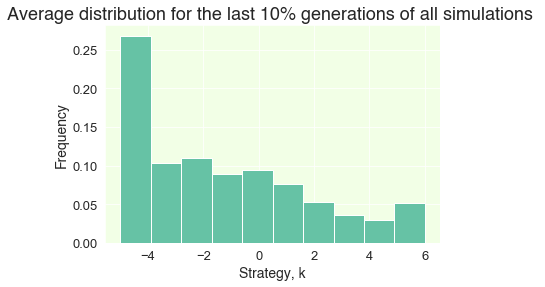

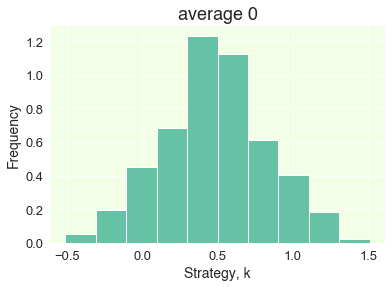

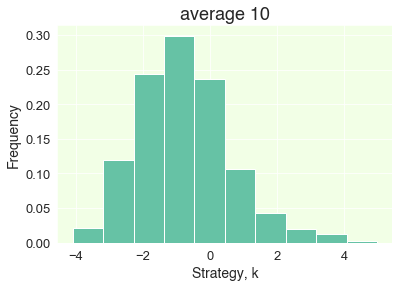

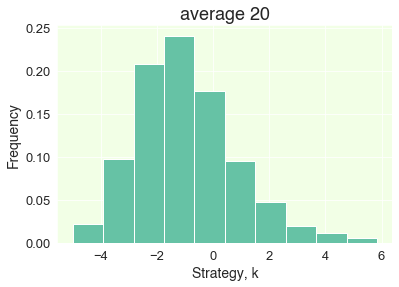

0.728


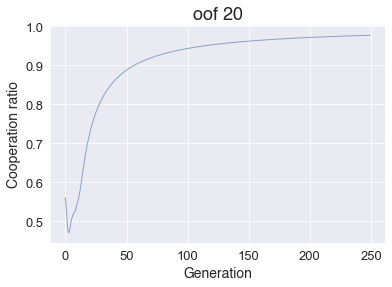

In [15]:
'''
figure(figsize=(20, 6), dpi=280)

plt.xlabel('Strategy, k',fontname='Helvetica')
plt.ylabel('Frequency',fontname='Helvetica')
ax = plt.gca()
ax.set_facecolor("#f2ffe6")

plt.title('Frequency distribution of strategies for {} generations per 10 000 simulations'.format(generations),fontname='Helvetica')
#print(Counter(global_strategies_numpy))
plt.hist( global_strategies_numpy, color=sns.color_palette('Set2')[0], linewidth=1, density=True)
plt.show()
'''



plt.xlabel('Strategy, k',fontname='Helvetica')
plt.ylabel('Frequency',fontname='Helvetica')
ax = plt.gca()
ax.set_facecolor("#f2ffe6")

plt.title('Average distribution for the last 10% generations of all simulations '.format(generations),fontname='Helvetica')
#print(Counter(global_strategies_average_numpy))
plt.hist( global_strategies_average_numpy, color=sns.color_palette('Set2')[0], linewidth=1, density=True)
plt.show()




plt.xlabel('Strategy, k',fontname='Helvetica')
plt.ylabel('Frequency',fontname='Helvetica')
ax = plt.gca()
ax.set_facecolor("#f2ffe6")

plt.title('average 0'.format(generations),fontname='Helvetica')
plt.hist( global_strategies_average_t0_numpy, color=sns.color_palette('Set2')[0], linewidth=1, density=True)
plt.show()




plt.xlabel('Strategy, k',fontname='Helvetica')
plt.ylabel('Frequency',fontname='Helvetica')
ax = plt.gca()
ax.set_facecolor("#f2ffe6")

plt.title('average 10'.format(generations),fontname='Helvetica')
plt.hist( global_strategies_average_t10_numpy, color=sns.color_palette('Set2')[0], linewidth=1, density=True)
plt.show()




plt.xlabel('Strategy, k',fontname='Helvetica')
plt.ylabel('Frequency',fontname='Helvetica')
ax = plt.gca()
ax.set_facecolor("#f2ffe6")

plt.title('average 20'.format(generations),fontname='Helvetica')
plt.hist( global_strategies_average_t20_numpy, color=sns.color_palette('Set2')[0], linewidth=1, density=True)
plt.show()


total = 0
for t in global_strategies_average_numpy:
    if t <= 0:
        total += 1
        
print(total/len(global_strategies_average_numpy))



plt.xlabel('Generation',fontname='Helvetica')
plt.ylabel('Cooperation ratio',fontname='Helvetica')
ax = plt.gca()
#ax.set_facecolor("#f2ffe6")

plt.title('oof 20'.format(generations),fontname='Helvetica')
plt.plot(range(generations), global_cooperative_strategies_numpy, color=sns.color_palette('Set2')[2], linewidth=1)
plt.show()




In [16]:
#Para cada simulação fazer a média das ultimas 10 gerações, só contabilizamos as estratégias nas ultimas 10 gerações

In [17]:
import altair as alt
import pandas as pd
import numpy as np
print(len(global_strategies_average_numpy))

percentages = []

for i in range(min_strat, max_strat+1):
    percentages.append(len([strat for strat in global_strategies_average_numpy if strat == i])/len(global_strategies_average_numpy))
    

print(sum([percentages[0], percentages[1],percentages[2],percentages[3],percentages[4],percentages[5]]))
print(percentages)
data = pd.DataFrame({'Strategy': np.array([-5,-4,-3,-2,-1,0,1,2,3,4,5,6]),'Frequency':np.array(percentages),  'color':['#F2994A' for c in range(len(percentages))]})



bar = alt.Chart(data).mark_bar(
    cornerRadiusTopLeft=3,
    cornerRadiusTopRight=3
).encode(x=alt.X('x', scale=alt.Scale(domain=(min_strat, max_strat))), y='Frequency', ).encode(
    x=alt.X('Strategy', scale=alt.Scale(domain=(min_strat, max_strat))),
    color=alt.Color('color', scale=None)
)





bar

1000
0.712
[0.153, 0.141, 0.109, 0.117, 0.094, 0.098, 0.079, 0.055, 0.039, 0.032, 0.03, 0.026]


alt.Chart(...)

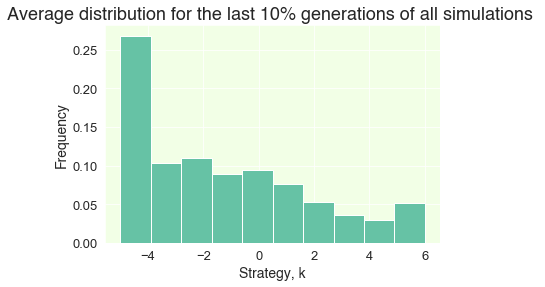

0.728
--
0.153
0.141
0.109
0.117
0.094
0.098
--
153
141
109
117
94
98
79
55
39
32
30
26


In [18]:

plt.xlabel('Strategy, k',fontname='Helvetica')
plt.ylabel('Frequency',fontname='Helvetica')
ax = plt.gca()
ax.set_facecolor("#f2ffe6")

plt.title('Average distribution for the last 10% generations of all simulations '.format(generations),fontname='Helvetica')
#print(Counter(global_strategies_average_numpy))
plt.hist( global_strategies_average_numpy, color=sns.color_palette('Set2')[0], linewidth=1, density=True)
plt.show()


cooperative_i = 0
for i in global_strategies_average_numpy:
    if i <= 0:
        cooperative_i += 1
        
print(cooperative_i/len(global_strategies_average_numpy))
print("--")


print(len([strat for strat in global_strategies_average_numpy if strat == -5.0])/len(global_strategies_average_numpy))
print(len([strat for strat in global_strategies_average_numpy if strat == -4.0])/len(global_strategies_average_numpy))
print(len([strat for strat in global_strategies_average_numpy if strat == -3.0])/len(global_strategies_average_numpy))
print(len([strat for strat in global_strategies_average_numpy if strat == -2.0])/len(global_strategies_average_numpy))
print(len([strat for strat in global_strategies_average_numpy if strat == -1.0])/len(global_strategies_average_numpy))
print(len([strat for strat in global_strategies_average_numpy if strat == 0.0])/len(global_strategies_average_numpy))

print("--")

for i in range(min_strat, max_strat+1):
    print(len([strat for strat in global_strategies_average_numpy if strat == i]))

In [13]:
#674
#210

data = pd.DataFrame({'Strategy': np.array([-5,-4,-3,-2,-1,0,1,2,3,4,5,6]),'Frequency':np.array([140,125,118,101,111,79,52,47,29,28,23,31]),  'color':['#F2994A' for c in range(len(percentages))]})



barNew = alt.Chart(data).mark_bar(
    cornerRadiusTopLeft=3,
    cornerRadiusTopRight=3
).encode(x=alt.X('Strategy', scale=alt.Scale(domain=(min_strat, max_strat))), y='Frequency', ).encode(
    color=alt.Color('color', scale=None)
)

barNew

alt.Chart(...)

In [28]:
#barabasi
from collections import Counter

vetor = [0.0, 0.0, 0.0, 0.0, 3.0175, -5.0, 4.5825, 3.0175, -5.0, 4.6875, -5.0, -2.0, -2.0, 0.0, -4.0, -3.0, -3.0, 0.0, 4.0, 0.0, -1.0, -3.0, -2.0, -1.0, 4.9275, -5.0, -4.0, 0.0, -3.0, -3.0, -1.0, 5.93, -3.0, -1.0, -5.0, 2.91, 4.17, 4.9375, -4.0, 3.325, -2.0, 0.0, 0.0, -3.0, -4.0, -2.0, 2.0375, 5.515, 0.04, 2.42, -4.0, -4.0, -3.0, -1.0, -4.0, 0.0, -5.0, 3.11, 4.0175, -3.0, 0.0, -1.0, 0.0, 4.0675, -5.0, -4.0, -2.0, -2.0, 2.06, 0.0, 3.33, 5.625, -2.0, 2.0375, -3.0, 4.945, 3.565, -4.0, -3.0, -3.0, 5.0, -1.0, 5.095, 5.0, 1.0, -3.0, -5.0, 5.0, -4.0, 2.98, 0.0, -1.0, -4.0, 2.885, 0.0, 0.0, -3.0, 0.0, -5.0, 0.0]
print(Counter(vetor))


import altair as alt
import pandas as pd
import numpy as np


data = pd.DataFrame({'strategy':np.array(vetor),  'color':['#27AE60' for c in range(len(vetor))]})

cooperative = 0
for i in vetor:
    if i <= 0:
        cooperative += 1
        
print(cooperative/len(vetor))

alt.Chart(data).mark_bar(
    cornerRadiusTopLeft=3,
    cornerRadiusTopRight=3
).encode(
    alt.X("strategy:Q"),
    y='count()',
)




alt.Chart(data).transform_joinaggregate(
    total='count(*)'
).transform_calculate(
    pct='1 / datum.total'
).mark_bar(
    cornerRadiusTopLeft=3,
    cornerRadiusTopRight=3
).encode(
    alt.X("strategy:Q", bin=alt.Bin(extent=[-6, 7], step=1)),
    #alt.X('strategy:Q'),
    alt.Y('sum(pct):Q', axis=alt.Axis(format='%'))
)


Counter({0.0: 19, -3.0: 14, -4.0: 11, -5.0: 9, -2.0: 8, -1.0: 8, 5.0: 3, 3.0175: 2, 2.0375: 2, 4.5825: 1, 4.6875: 1, 4.0: 1, 4.9275: 1, 5.93: 1, 2.91: 1, 4.17: 1, 4.9375: 1, 3.325: 1, 5.515: 1, 0.04: 1, 2.42: 1, 3.11: 1, 4.0175: 1, 4.0675: 1, 2.06: 1, 3.33: 1, 5.625: 1, 4.945: 1, 3.565: 1, 5.095: 1, 1.0: 1, 2.98: 1, 2.885: 1})
0.69


alt.Chart(...)

In [30]:
from collections import Counter
#stragatz
vetor = [-3.97, 4.1925, -1.7075, -2.0875, -2.865, -0.4575, -2.1475, -2.16, -2.965, -3.4025, -1.76, -1.8125, -2.1175, -2.7775, -0.75, -1.7825, -2.6175, 2.14, -3.155, -0.8025, -3.71, -2.525, -2.57, -1.555, -2.0175, -1.4525, -0.73, -1.475, -1.95, -3.27, -4.045, -1.365, -2.23, -2.2125, -2.5075, -1.465, -1.4525, -1.015, -1.505, -3.26, -2.2825, -2.535, -3.665, -3.5725, -3.0525, -2.93, -1.025, -3.3125, -3.1925, -1.93, -2.0625, -2.51, -0.79, -3.1175, -2.44, -2.25, -3.0175, -2.2475, -3.41, -2.765, -1.3125, -3.2375, -3.255, -1.8725, -2.03, -3.0175, -2.8325, 4.1825, -1.3825, -1.5075, -2.4575, -1.6475, -2.385, 4.9625, 2.865, -1.3625, -1.24, -1.3625, -1.21, -2.2625, -1.87, -2.61, -2.7525, -1.1225, -2.8625, -3.6075, -2.615, -1.235, -1.7125, -2.7775, 0.705, -1.89, -3.2025, 5.3125, -3.32, -1.4075, -2.1275, -1.625, 1.585, -1.46]
print(Counter(vetor))

cooperative = 0
for i in vetor:
    if i <= 0:
        cooperative += 1
        
print(cooperative/len(vetor))


import altair as alt
import pandas as pd
import numpy as np


data = pd.DataFrame({'strategy':np.array(vetor),  'color':['#27AE60' for c in range(len(vetor))]})

alt.Chart(data).mark_bar(
    cornerRadiusTopLeft=3,
    cornerRadiusTopRight=3
).encode(
    alt.X("strategy:Q", bin=alt.Bin(extent=[-5, 6], step=0.5)),
    y='count()',
)



alt.Chart(data).transform_joinaggregate(
    total='count(*)'
).transform_calculate(
    pct='1 / datum.total'
).mark_bar(
    cornerRadiusTopLeft=3,
    cornerRadiusTopRight=3
).encode(
    alt.X("strategy:Q", bin=alt.Bin(extent=[-6, 7], step=1)),
    alt.Y('sum(pct):Q', axis=alt.Axis(format='%'))
)


Counter({-2.7775: 2, -1.4525: 2, -3.0175: 2, -1.3625: 2, -3.97: 1, 4.1925: 1, -1.7075: 1, -2.0875: 1, -2.865: 1, -0.4575: 1, -2.1475: 1, -2.16: 1, -2.965: 1, -3.4025: 1, -1.76: 1, -1.8125: 1, -2.1175: 1, -0.75: 1, -1.7825: 1, -2.6175: 1, 2.14: 1, -3.155: 1, -0.8025: 1, -3.71: 1, -2.525: 1, -2.57: 1, -1.555: 1, -2.0175: 1, -0.73: 1, -1.475: 1, -1.95: 1, -3.27: 1, -4.045: 1, -1.365: 1, -2.23: 1, -2.2125: 1, -2.5075: 1, -1.465: 1, -1.015: 1, -1.505: 1, -3.26: 1, -2.2825: 1, -2.535: 1, -3.665: 1, -3.5725: 1, -3.0525: 1, -2.93: 1, -1.025: 1, -3.3125: 1, -3.1925: 1, -1.93: 1, -2.0625: 1, -2.51: 1, -0.79: 1, -3.1175: 1, -2.44: 1, -2.25: 1, -2.2475: 1, -3.41: 1, -2.765: 1, -1.3125: 1, -3.2375: 1, -3.255: 1, -1.8725: 1, -2.03: 1, -2.8325: 1, 4.1825: 1, -1.3825: 1, -1.5075: 1, -2.4575: 1, -1.6475: 1, -2.385: 1, 4.9625: 1, 2.865: 1, -1.24: 1, -1.21: 1, -2.2625: 1, -1.87: 1, -2.61: 1, -2.7525: 1, -1.1225: 1, -2.8625: 1, -3.6075: 1, -2.615: 1, -1.235: 1, -1.7125: 1, 0.705: 1, -1.89: 1, -3.2025: 1, 

alt.Chart(...)